# 3-SAT

$\varphi$ = (¬$x_{1}$∨ $x_{2}$∨ $x_{4}$) ∧ (¬$x_{2}$∨ $x_{3}$ ∨ $x_{4}$) ∧ ($x_{1}$ ∨ ¬$x_{3}$ ∨ $x_{4}$) ∧ ($x_{1}$∨ ¬$x_{2}$ ∨ ¬$x_{4}$) ∧ ($x_{2}$∨ ¬$x_{3}$ ∨ ¬$x_{4}$) ∧ (¬$x_{1}$∨ $x_{3}$ ∨ ¬$x_{4}$) ∧ ($x_{1}$∨ $x_{2}$ ∨ $x_{3}$)

In [14]:
import random
import matplotlib.pyplot as plt
import numpy as np
from deap import base, creator, tools, algorithms

In [17]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [21]:
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=4)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

print(toolbox.individual())

[0, 1, 1, 0]


### Inputy (formuły) wykorzystane do testowania programów:
- 4 zmienne; 7 klauzul
- 6 zmiennych; 10 klauzul
- 8 zmiennych; 12 klauzul
- 8 zmiennych; 100 klauzul
- 10 zmiennych; 20 klauzul
- 10 zmiennych; 40 klauzul
- 10 zmiennych; 100 klauzul
- 20 zmiennych; 100 klauzul

###### Generowane z https://toughsat.appspot.com do plików dimacs, w postaci liczb.
Poniższy kod wprowadza dane z pliku do tablicy w formie `formulaExampleInput`.

In [22]:
with open("./Formules/random_ksat_4-7_1.dimacs") as f:
    content = f.readlines()[2:]
content = [x.strip() for x in content]
content = [string[:-2] for string in content]
formula = []
for i in content:
    formula.append(list(map(lambda x : int(x), i.split())))

formulaExampleInput = [[-2, -1, -4],
                       [-2, -4, 1],
                       [-4, -3, -2],
                       [1, 3, 2],
                       [-2, 4, -1],
                       [-4, -3, -2],
                       [-1, 2, -4]]

# Fitness

In [28]:
def helper(*x):
    chromosome = []
    for clause in formula:
        temp = []
        for variable in clause:
            for index, i in enumerate(x):
                if abs(variable) == index + 1:
                    temp.append(i if variable > 0 else not i)
        chromosome.append(temp)
    return sum([any(i) for i in chromosome])

def fitness(individual):
    s = helper(*individual)
    return s,

In [29]:
toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.10)
toolbox.register("select", tools.selBest) #best

In [30]:
def main():
    mu = 2
    lambda_ = 13
    cxpb = 0.6
    mutpb = 0.01
    ngen = 5
    
    pop = toolbox.population(n=15)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)
    
    pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, mu, lambda_, cxpb, mutpb, ngen, stats=stats, halloffame=hof, verbose=True)
    
    return pop, logbook, hof

gen	nevals	avg	min	max
0  	15    	6  	5  	7  
1  	10    	7  	7  	7  
2  	8     	7  	7  	7  
3  	10    	7  	7  	7  
4  	5     	7  	7  	7  
5  	10    	7  	7  	7  
Best individual is: [1, 1, 0, 0]
with fitness: 7


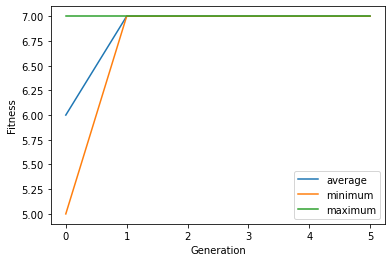

In [37]:
#4 zmienne 7 klauzul
if __name__ == "__main__":
    pop, log, hof = main()
    print("Best individual is: %s\nwith fitness: %s" % (hof[0], helper(*hof[0])))
    
    gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
    plt.plot(gen, avg, label="average")
    plt.plot(gen, min_, label="minimum")
    plt.plot(gen, max_, label="maximum")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
def main():
    mu = 10
    lambda_ = 190
    cxpb = 0.6
    mutpb = 0.01
    ngen = 10
    
    pop = toolbox.population(n=200)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)
    
    pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, mu, lambda_, cxpb, mutpb, ngen, stats=stats, halloffame=hof, verbose=True)
    
    return pop, logbook, hof

gen	nevals	avg  	min	max
0  	100   	34.69	30 	39 
1  	64    	38.2 	38 	39 
2  	57    	39.2 	39 	40 
3  	54    	40   	40 	40 
4  	54    	40   	40 	40 
5  	59    	40   	40 	40 
6  	45    	40   	40 	40 
7  	56    	40   	40 	40 
8  	54    	40   	40 	40 
9  	58    	40   	40 	40 
10 	58    	40   	40 	40 
Best individual is: [0, 0, 0, 1, 0, 1, 1, 1, 1, 0]
with fitness: 40


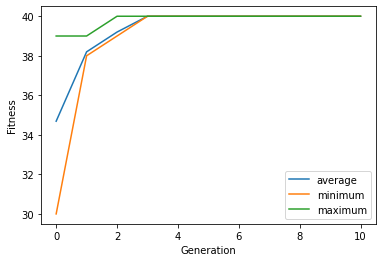

In [19]:
#10 zmiennych 40 klauzul
if __name__ == "__main__":
    pop, log, hof = main()
    print("Best individual is: %s\nwith fitness: %s" % (hof[0], helper(*hof[0])))
    
    gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
    plt.plot(gen, avg, label="average")
    plt.plot(gen, min_, label="minimum")
    plt.plot(gen, max_, label="maximum")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="lower right")
    plt.show()

In [67]:
def main():
    mu = 50
    lambda_ = 950
    cxpb = 0.6
    mutpb = 0.001
    ngen = 10
    
    pop = toolbox.population(n=1000)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)
    
    pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, mu, lambda_, cxpb, mutpb, ngen, stats=stats, halloffame=hof, verbose=True)
    
    return pop, logbook, hof

gen	nevals	avg 	min	max
0  	100   	87.8	77 	95 
1  	61    	94.5	94 	95 
2  	66    	95.4	95 	97 
3  	55    	96.7	96 	97 
4  	56    	97  	97 	97 
5  	61    	97  	97 	97 
6  	71    	97  	97 	97 
7  	57    	97  	97 	97 
8  	61    	97.1	97 	98 
9  	65    	98.1	97 	100
10 	77    	100 	100	100
Best individual is: [1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0]
with fitness: 100


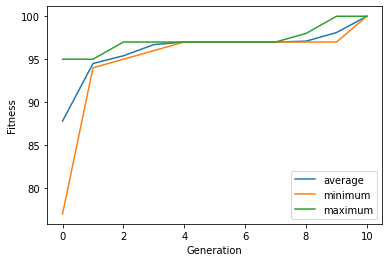

In [82]:
#20 zmiennych 100 klauzul
if __name__ == "__main__":
    pop, log, hof = main()
    print("Best individual is: %s\nwith fitness: %s" % (hof[0], helper(*hof[0])))
    
    gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
    plt.plot(gen, avg, label="average")
    plt.plot(gen, min_, label="minimum")
    plt.plot(gen, max_, label="maximum")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="lower right")
    plt.show()

# Bruteforce

In [41]:
def bruteforce(formula):
    formula_abs = np.abs(formula)
    n = np.max(formula_abs)
    indexes = formula_abs - 1
    signs = np.sign(formula)
    
    base = np.full(n, 0)
    for i in range(2**n):
        perm = np.concatenate((base, [int(x) for x in bin(i)[2:]]))[-n:]
#         print("Permutation:", perm)
        
        result = np.empty((0,1), int)
        for pos1, index in enumerate(indexes):
            mapper = lambda x: perm[x[1]] if signs[pos1, x[0]] == 1 else perm[x[1]] ^ 1
            result = np.vstack((result, np.fromiter(map(mapper, enumerate(index)), dtype=int).any()))
        
        if result.all():
            return perm

In [37]:
#4 zmienne 7 klauzul            
print(bruteforce(formula))

Permutation: [0 0 0 0]
[0 0 0 0]


In [42]:
#10 zmiennych 40 klauzul      
print(bruteforce(formula))

Permutation: [0 0 0 0 0 0 0 0 0 0]
Permutation: [0 0 0 0 0 0 0 0 0 1]
Permutation: [0 0 0 0 0 0 0 0 1 0]
Permutation: [0 0 0 0 0 0 0 0 1 1]
Permutation: [0 0 0 0 0 0 0 1 0 0]
Permutation: [0 0 0 0 0 0 0 1 0 1]
Permutation: [0 0 0 0 0 0 0 1 1 0]
Permutation: [0 0 0 0 0 0 0 1 1 1]
Permutation: [0 0 0 0 0 0 1 0 0 0]
Permutation: [0 0 0 0 0 0 1 0 0 1]
Permutation: [0 0 0 0 0 0 1 0 1 0]
Permutation: [0 0 0 0 0 0 1 0 1 1]
Permutation: [0 0 0 0 0 0 1 1 0 0]
Permutation: [0 0 0 0 0 0 1 1 0 1]
Permutation: [0 0 0 0 0 0 1 1 1 0]
Permutation: [0 0 0 0 0 0 1 1 1 1]
Permutation: [0 0 0 0 0 1 0 0 0 0]
Permutation: [0 0 0 0 0 1 0 0 0 1]
Permutation: [0 0 0 0 0 1 0 0 1 0]
Permutation: [0 0 0 0 0 1 0 0 1 1]
Permutation: [0 0 0 0 0 1 0 1 0 0]
Permutation: [0 0 0 0 0 1 0 1 0 1]
Permutation: [0 0 0 0 0 1 0 1 1 0]
Permutation: [0 0 0 0 0 1 0 1 1 1]
Permutation: [0 0 0 0 0 1 1 0 0 0]
Permutation: [0 0 0 0 0 1 1 0 0 1]
Permutation: [0 0 0 0 0 1 1 0 1 0]
Permutation: [0 0 0 0 0 1 1 0 1 1]
Permutation: [0 0 0 

## Porównanie efektywności algorytmu genetycznego z bruteforce'm

| Algorytm | Input (4 zmienne 7 klauzul)  | Input (6 zmiennych 10 klauzul) | Input (8 zmiennych 12 klauzul) | Input (8 zmiennych 100 klauzul) | Input (10 zmiennych 20 klauzul) | Input (10 zmiennych 40 klauzul) | Input (10 zmiennych 100 klauzul) | Input (20 zmiennych 100 kaluzul)  |
|---|-------------|-----------:|------:|------:|------:|------:|------:|------:|
| Algorytm genetyczny (fitness) | 0,38 sek. <br>(mut=1%, elita, pop=15, selBest)</br> | 0,40 sek. <br>(mut=1%, elita, pop=25, selBest)</br> | 0,43 sek. <br> (mut=1%, elita, pop=50, selBest) </br> | 1,15 sek. <br>(mut=1%, elita, pop=100, selBest) </br><br><font color='red'>Nie znaleziono rozwiązania</font></br>  | 0,72 sek. <br>(mut=1%, elita, pop=100, selBest)</br> | 0,44 sek. <br> (mut=1%, elita, pop=200, selBest)<br> | 2,02 sek. <br>(mut=0,05%, elita, pop=500, selBest) </br><br><font color='red'>Nie znaleziono rozwiązania</font></br> |  3,95 sek. <br>(mut=0,01%, elita, pop=1000, selBest)  |
| Algorytm bruteforce | 0,15 sek.   | 0,20 sek. | 0,23 sek. | 0,78 sek. <br><font color='red'>Nie znaleziono rozwiązania</font></br> | 0,41 sek. | 0,40 sek. | 1,87 sek. <br><font color='red'>Nie znaleziono rozwiązania</font></br>  | 12 min. 19,30 sek.   |

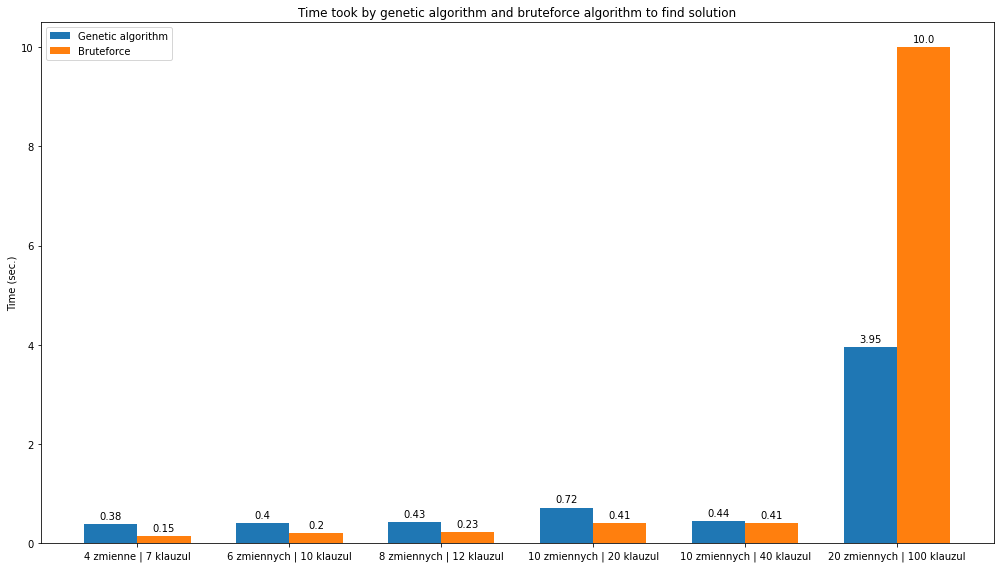

In [72]:
import matplotlib
import matplotlib.pyplot as plt

labels = ['4 zmienne | 7 klauzul', '6 zmiennych | 10 klauzul', '8 zmiennych | 12 klauzul', '10 zmiennych | 20 klauzul', "10 zmiennych | 40 klauzul", "20 zmiennych | 100 klauzul"]
fitness = [0.38, 0.40, 0.43, 0.72, 0.44, 3.95]
bruteforce = [0.15, 0.20, 0.23, 0.41, 0.41, 10]

x = np.arange(len(labels)) 
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, fitness, width, label='Genetic algorithm')
rects2 = ax.bar(x + width/2, bruteforce, width, label='Bruteforce')

ax.set_ylabel('Time (sec.)')
ax.set_title('Time took by genetic algorithm and bruteforce algorithm to find solution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()